<a href="https://colab.research.google.com/github/mrezaadi/DQLAB-Note/blob/main/Google%20Colab/DQLAB_Data_Manipulation_wiht_Pandas_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

**APPEND**

In [ ]:
# Buat series of int (s1) dan series of string (s2)
s1 = pd.Series([1,2,3,4,5,6])
s2 = pd.Series(["a", "b", "c", "d", "e", "f"])
# Terapkan method append
s2_append_s1 = s2.append(s1)
print("Series - append:\n", s2_append_s1)
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
		   'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
		   'a':[3,4]})
# Terapkan method append
df2_append_df1 = df2.append(df1)
print("Dataframe - append:\n", df2_append_df1)

Series - append:
 0    a
1    b
2    c
3    d
4    e
5    f
0    1
1    2
2    3
3    4
4    5
5    6
dtype: object
Dataframe - append:
    b  a
0  1  3
1  2  4
0  3  1
1  4  2


**CONCAT**

In [ ]:
# Buat dataframe df1 dan df2
df1 = pd.DataFrame({'a':[1,2],
					'b':[3,4]})
df2 = pd.DataFrame({'b':[1,2],
					'a':[3,4]})
# Terapkan method concat row-wise
row_wise_concat = pd.concat([df1,df2])
print("Row-wise - concat:\n", row_wise_concat)
# Terapkan method concat column-wise
col_wise_concat = pd.concat([df1,df2], axis=1)
print("Column-wise - concat:\n", col_wise_concat)
# Penambahan identifier --> membentuk hasil penggabungan multiindex
multiindex_concat = pd.concat([df1,df2], axis=0, keys=['df1', 'df2'])
print("Multiindex - concat:\n", multiindex_concat)

Row-wise - concat:
    a  b
0  1  3
1  2  4
0  3  1
1  4  2
Column-wise - concat:
    a  b  b  a
0  1  3  1  3
1  2  4  2  4
Multiindex - concat:
        a  b
df1 0  1  3
    1  2  4
df2 0  3  1
    1  4  2


**MERGE**

In [ ]:
# Untuk index tunggal

# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Merge yang ekivalen dengan SQL left join
merge_df_left = pd.merge(left=df1, right=df2, how='left', left_on='key', right_on='key') #Berdasarkan key yang sama. right_on dan key_on menunjukkan pada 'key' yang sama.
print('Merge - Left:\n', merge_df_left)
# Merge yang ekivalen dengan SQL right join
merge_df_right = pd.merge(left=df1, right=df2, how='right', left_on='key', right_on='key')
print('Merge - Right:\n', merge_df_right)
# Merge yang ekivalen dengan SQL inner join
merge_df_inner = pd.merge(left=df1, right=df2, how='inner', left_on='key', right_on='key')
print('Merge - Inner:\n', merge_df_inner)
# Merge yang ekivalen dengan SQL outer join
merge_df_outer = pd.merge(left=df1, right=df2, how='outer', left_on ='key', right_on='key')
print('Merge - Outer:\n', merge_df_outer)

Merge - Left:
   key  val1  val2  val3  val4
0  k1   200    30   1.0   6.0
1  k2   500    50   NaN   NaN
2  k3     0   100   2.0   7.0
3  k4   500    20   NaN   NaN
4  k5   100    10   3.0   8.0
Merge - Right:
    key   val1   val2  val3  val4
0   k1  200.0   30.0     1     6
1   k3    0.0  100.0     2     7
2   k5  100.0   10.0     3     8
3   k7    NaN    NaN     4     8
4  k10    NaN    NaN     5    10
Merge - Inner:
   key  val1  val2  val3  val4
0  k1   200    30     1     6
1  k3     0   100     2     7
2  k5   100    10     3     8
Merge - Outer:
    key   val1   val2  val3  val4
0   k1  200.0   30.0   1.0   6.0
1   k2  500.0   50.0   NaN   NaN
2   k3    0.0  100.0   2.0   7.0
3   k4  500.0   20.0   NaN   NaN
4   k5  100.0   10.0   3.0   8.0
5   k7    NaN    NaN   4.0   8.0
6  k10    NaN    NaN   5.0  10.0


In [ ]:
#Multi Index

# Buat dataframe df1 dan df2
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
}).set_index(['key', 'val2'])
print('Dataframe 1:\n', df1)
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
}).set_index(['key', 'val3'])
print('Dataframe 2:\n', df2)
# Merge dataframe yang memiliki multi index
df_merge = pd.merge(df1.reset_index(), df2.reset_index())
print('Merging dataframe:\n', df_merge)

Dataframe 1:
           val1
key val2      
k1  30     200
k2  50     500
k3  100      0
k4  20     500
k5  10     100
Dataframe 2:
           val4
key val3      
k1  1        6
k3  2        7
k5  3        8
k7  4        8
k10 5       10
Merging dataframe:
   key  val2  val1  val3  val4
0  k1    30   200     1     6
1  k3   100     0     2     7
2  k5    10   100     3     8


**JOIN**

In [ ]:
df1 = pd.DataFrame({
   'key':['k1','k2','k3','k4','k5'],
   'val1':[200, 500, 0, 500, 100],
   'val2':[30, 50, 100, 20, 10]
})
df2 = pd.DataFrame({
   'key':['k1','k3','k5','k7','k10'],
   'val3':[1,2,3,4,5],
   'val4':[6,7,8,8,10]
})
# Penerapan join dengan menggunakan set_index dan keyword how
join_df = df1.set_index('key').join(df2.set_index('key'), how='outer')
print(join_df)

      val1   val2  val3  val4
key                          
k1   200.0   30.0   1.0   6.0
k10    NaN    NaN   5.0  10.0
k2   500.0   50.0   NaN   NaN
k3     0.0  100.0   2.0   7.0
k4   500.0   20.0   NaN   NaN
k5   100.0   10.0   3.0   8.0
k7     NaN    NaN   4.0   8.0


**PIVOT**

* Format ulang pada dataset itu sangatlah penting, biasanya hal ini dilakukan untuk mengetahui keseluruhan data secara cepat dengan chart atau visualisasi. Untuk orang yang sudah mahir menggunakan spreadsheet pastilah tau banyak tentang fitur pivot ini.

* Di Pandas, ada beberapa teknik untuk melakukan pivot atau unpivot yang biasa disebut as melt di Pandas, terdapat pula konsep stack yang artinya menumpuk data dengan kolom yang lebih sedikit (stack) sama seperti konsep melt dan ada pula yang memperluas data dengan kolom yang lebih banyak (unstack) sama seperti konsep pivot.

In [ ]:
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
# Unique value pada setiap kolom data
for column in data.columns:
    print('Unique value %s: %s' % (column, data[column].unique()))

# Pivoting with single column measurement
pivot1 = data.pivot(index='murid', columns='pelajaran', values='nilai')
print('Pivoting with single column measurement:\n', pivot1)
# Pivoting with multiple column measurement
pivot2 = data.pivot(index='murid', columns='pelajaran')
print('Pivoting with multiple column measurement:\n', pivot2)
data

Unique value kelas: ['A' 'B']
Unique value murid: ['A1' 'A2' 'A3' 'B1' 'B2' 'B3']
Unique value pelajaran: ['math' 'english']
Unique value nilai: [ 90  60  70  85  50 100  40  95  80  45]
Pivoting with single column measurement:
 pelajaran  english  math
murid                   
A1              60    90
A2              85    70
A3              60    50
B1              40   100
B2              80    95
B3              45    60
Pivoting with multiple column measurement:
             kelas        nilai     
pelajaran english math english math
murid                              
A1              A    A      60   90
A2              A    A      85   70
A3              A    A      60   50
B1              B    B      40  100
B2              B    B      80   95
B3              B    B      45   60


,kelas,murid,pelajaran,nilai
0,A,A1,math,90
1,A,A1,english,60
2,A,A2,math,70
3,A,A2,english,85
4,A,A3,math,50
5,A,A3,english,60
6,B,B1,math,100
7,B,B1,english,40
8,B,B2,math,95
9,B,B2,english,80


**PIVOT TABLE**

* Index di dataframe adalah unique identifier untuk setiap row, jadi tidak boleh ada duplikat dan setiap membuat pivot tabel, harus specify index as kolom yang mana dan columns nya memakai kolom yang mana.

* Hal ini dapat diatasi dengan melakukan method .pivot_table() pada dataframe. Metode ini sama seperti melakukan pivot pada tabel tapi juga melakukan groupby dan aggregation (aggfunc) pada level rows sehingga dipastikan tidak ada duplicate index di rows (secara default aggfunc = 'mean').

In [ ]:
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas', 'murid', 'pelajaran', 'nilai'])
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc=sum
pivot_tab_sum = data.pivot_table(index='kelas', columns='pelajaran', values='nilai',aggfunc=sum)
print('Creating pivot table -- aggfunc sum:\n', pivot_tab_sum)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='mean'
pivot_tab_mean = data.pivot_table(index='kelas', columns='pelajaran', values='nilai', aggfunc='mean')
print('Creating pivot table -- aggfunc mean:\n', pivot_tab_mean)
# Creating pivot and assign pivot_tab dengan menggunakan keyword aggfunc='median'
pivot_tab_median = data.pivot_table(index='kelas', columns='pelajaran', values='nilai',aggfunc='median')
print('Creating pivot table -- aggfunc median:\n', pivot_tab_median)

Creating pivot table -- aggfunc sum:
 pelajaran  english  math
kelas                   
A              205   210
B              165   255
Creating pivot table -- aggfunc mean:
 pelajaran    english  math
kelas                     
A          68.333333  70.0
B          55.000000  85.0
Creating pivot table -- aggfunc median:
 pelajaran  english  math
kelas                   
A               60    70
B               45    95


**MELT**

Teknik melt melalui pd.melt() digunakan untuk mengembalikan kondisi data yang sudah dilakukan pivot menjadi sebelum pivot.

In [ ]:
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
# Pivoting dataframe
data_pivot = data.pivot_table(index='kelas', columns='pelajaran', values='nilai',aggfunc='mean').reset_index()
print('Pivoting dataframe:\n', data_pivot)
# [1] Melting dataframe data_pivot
data_melt_1 = pd.melt(data_pivot)
print('Melting dataframe:\n', data_melt_1)
# [2] Melting dataframe data_pivot dengan id_vars
# Dengan menspesifikasi keyword argument id_vars yang ditujukan untuk membuat fix kolom yang sebagai id tiap barisnya
data_melt_2 = pd.melt(data_pivot, id_vars='kelas')
print('Melting dataframe dengan idvars:\n', data_melt_2)
# [3.a] Melting dataframe data_pivot dengan value_vars
# Dengan menspesifikasikan keyword argument value_vars yang digunakan untuk menampilkan variasi value apa saja yang perlu dimunculkan di kolom variable. 
data_melt_3a = pd.melt(data_pivot, value_vars=['math'])
print('Melting dataframe dengan value_vars:\n', data_melt_3a)
# [3.b] Melting dataframe data_pivot dengan id_vars dan value_vars
data_melt_3b = pd.melt(data_pivot, id_vars='kelas', value_vars=['math'])
print('Melting dataframe dengan id_vars dan value_vars:\n', data_melt_3b)
# [4] Melting dataframe data_pivot dengan id_vars, value_vars, var_name. dan value_name
# Dengan spesifikasikan keyword argument var_name dan value_name yang digunakan untuk menampilkan nama kolom untuk variable dan value
data_melt_4 = pd.melt(data_pivot, id_vars='kelas', value_vars=['english', 'math'], var_name='pelajaran', value_name='nliai ') #var_name dan value_name = menentukan nama tabel
print('Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:\n', data_melt_4)

Pivoting dataframe:
 pelajaran kelas    english  math
0             A  68.333333  70.0
1             B  55.000000  85.0
Melting dataframe:
   pelajaran    value
0     kelas        A
1     kelas        B
2   english  68.3333
3   english       55
4      math       70
5      math       85
Melting dataframe dengan idvars:
   kelas pelajaran      value
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000
Melting dataframe dengan value_vars:
   pelajaran  value
0      math   70.0
1      math   85.0
Melting dataframe dengan id_vars dan value_vars:
   kelas pelajaran  value
0     A      math   70.0
1     B      math   85.0
Melting dataframe dengan id_vars, value_vars, var_name. dan value_name:
   kelas pelajaran     nliai 
0     A   english  68.333333
1     B   english  55.000000
2     A      math  70.000000
3     B      math  85.000000


**STACK DAN UNSTACK**

Konsep stacking dan unstacking sama dengan melt dan pivot secara berurutan, hanya saja tidak memasukkan index sebagai parameter di stack/unstack tapi harus set index terlebih dahulu, baru bisa melakukan stacking/unstacking dengan level yang bisa ditentukan sendiri.

In [ ]:
#Unstack
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
print('Dataframe:\n', data)
# Set index data untuk kolom kelas, murid, dan pelajaran
data = data.set_index(['kelas', 'murid', 'pelajaran'])
print('Dataframe multi index:\n', data)
# [1] Unstacking dataframe
data_unstack_1 = data.unstack()
print('Unstacking dataframe:\n', data_unstack_1)
# [2] Unstacking dengan specify level name
data_unstack_2 = data.unstack(level='murid')
print('Unstacking dataframe dengan level name:\n', data_unstack_2)
# [3] Unstacking dengan specify level position
data_unstack_3 = data.unstack(level=1)
print('Unstacking dataframe dengan level position:\n', data_unstack_3)

#Quiz
print("\nQuiz")
print(data.unstack())
print(data.unstack([0,1])) #Berdasarkan urutan index nya, artinya index ke-0('kelas') dan index ke-1('murid') dipindahkan ke atas
print(data.unstack([0,2]))
print(data.unstack([1,2]))

Dataframe:
    kelas murid pelajaran  nilai
0      A    A1      math     90
1      A    A1   english     60
2      A    A2      math     70
3      A    A2   english     85
4      A    A3      math     50
5      A    A3   english     60
6      B    B1      math    100
7      B    B1   english     40
8      B    B2      math     95
9      B    B2   english     80
10     B    B3      math     60
11     B    B3   english     45
Dataframe multi index:
                        nilai
kelas murid pelajaran       
A     A1    math          90
            english       60
      A2    math          70
            english       85
      A3    math          50
            english       60
B     B1    math         100
            english       40
      B2    math          95
            english       80
      B3    math          60
            english       45
Unstacking dataframe:
               nilai     
pelajaran   english math
kelas murid             
A     A1         60   90
      A2         85

In [ ]:
#Stack
# Dataframe
data = pd.DataFrame({
  'kelas': 6*['A'] + 6*['B'],
  'murid': 2*['A1'] + 2*['A2'] + 2*['A3'] + 2*['B1'] + 2*['B2'] + 2*['B3'],
  'pelajaran': 6*['math','english'],
  'nilai': [90,60,70,85,50,60,100,40,95,80,60,45]
}, columns=['kelas','murid','pelajaran','nilai'])
data = data.set_index(['kelas','murid','pelajaran'])
data_unstack = data.unstack(level=1)
print('Dataframe:\n', data_unstack)
# [1] Stacking dataframe
data_stack = data_unstack.stack()
print('Stacked dataframe:\n', data_stack)
# [2] Tukar posisi index setelah stacking dataframe
data_swap = data_stack.swaplevel(1,2)
print('Swapped data:\n', data_swap)
# [3] Melakukan sort_index pada stacking dataframe
data_sort = data_swap.sort_index()
print('Sorted data:\n', data_sort)

Dataframe:
                 nilai                               
murid              A1    A2    A3     B1    B2    B3
kelas pelajaran                                     
A     english    60.0  85.0  60.0    NaN   NaN   NaN
      math       90.0  70.0  50.0    NaN   NaN   NaN
B     english     NaN   NaN   NaN   40.0  80.0  45.0
      math        NaN   NaN   NaN  100.0  95.0  60.0
Stacked dataframe:
                        nilai
kelas pelajaran murid       
A     english   A1      60.0
                A2      85.0
                A3      60.0
      math      A1      90.0
                A2      70.0
                A3      50.0
B     english   B1      40.0
                B2      80.0
                B3      45.0
      math      B1     100.0
                B2      95.0
                B3      60.0
Swapped data:
                        nilai
kelas murid pelajaran       
A     A1    english     60.0
      A2    english     85.0
      A3    english     60.0
      A1    math        90.0
  

**AGREGASI**

Teknik agregasi diperlukan ketika mau melihat dataset dengan view yang berbeda, bisa set data tersebut akan dikelompokkan seperti apa, yang kemudian juga bisa menerapkan beberapa fungsi atau metode statistik ke hasil group dataset itu untuk mengetahui behavior dari data tersebut secara summary/overview.

Groupby memiliki konsep untuk
* Split: melakukan indexing/multi-indexing dengan apa yang di specify as groupby menjadi kelompok
* Apply: menerapkan fungsi pada masing-masing kelompok tersebut
* Combine: mengumpulkan semua hasil fungsi dari tiap kelompok kembali menjadi dataframe

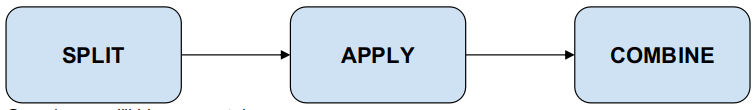



In [ ]:
# Load data global_air_quality.csv
global_air_quality = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
print('Lima data teratas:\n', global_air_quality.head())
# Melakukan pengecekan terhadap data
print('Info global_air_quality:\n', global_air_quality.info())
# Melakukan count tanpa groupby
print('Count tanpa groupby:\n', global_air_quality.count())
# Melakukan count dengan groupby 
gaq_groupby_count = global_air_quality.groupby('source_name').count()
print('Count dengan groupby (5 data teratas):\n', gaq_groupby_count.head())
print(global_air_quality.isnull().any())

Lima data teratas:
                           location  ... averaged_over_in_hours
0                  MOBILE-KICKAPOO  ...                   1.00
1                  Oxford St Ebbes  ...                   1.00
2                 BROADWAY (South)  ...                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
4                        Manglerud  ...                   1.00

[5 rows x 11 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   object 
 2   country                 4000 non-null   object 
 3   pollutant               4000 non-null   object 
 4   value                   4000 non-null   float64
 5   timestamp               4000 non-null   object 
 6   unit                    4000 non-null   obj

In [ ]:
# Load data global_air_quality.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Create variabel pollutant 
pollutant = gaq[['country', 'city', 'pollutant', 'value']].pivot_table(index=['country', 'city'],columns='pollutant').fillna(0)
print('Data pollutant (5 teratas):\n', pollutant.head())
# [1] Group berdasarkan country dan terapkan aggregasi mean
pollutant_mean = pollutant.groupby('country').mean()
print('Rata-rata pollutant (5 teratas):\n', pollutant_mean.head())
# [2] Group berdasarkan country dan terapkan aggregasi std
pollutant_std = pollutant.groupby('country').std().fillna(0)
print('Standar deviasi pollutant (5 teratas):\n', pollutant_std.head())
# [3] Group berdasarkan country dan terapkan aggregasi sum
pollutant_sum = pollutant.groupby('country').sum()
print('Total pollutant (5 teratas):\n', pollutant_sum.head())
# [4] Group berdasarkan country dan terapkan aggregasi nunique
pollutant_nunique = pollutant.groupby('country').nunique()
print('Jumlah unique value pollutant (5 teratas):\n', pollutant_nunique.head())
# [5] Group berdasarkan country dan terapkan aggregasi max
pollutant_max = pollutant.groupby('country').max()
print('Max value pollutant (5 teratas):\n', pollutant_max.head())
# [6] Group berdasarkan country dan terapkan aggregasi min
pollutant_min = pollutant.groupby('country').min()
print('Min value pollutant (5 teratas):\n', pollutant_min.head())

Data pollutant (5 teratas):
                      value                                     
pollutant               bc      co   no2   o3   pm10  pm25  so2
country city                                                   
AR      Buenos Aires   0.0     0.0   0.0  0.0    0.0  18.1  0.0
AU      Townsville     0.0     0.0   0.0  0.0    0.0   3.9  0.0
BA      Goražde        0.0   141.0  19.0  8.0    0.0   0.0  0.0
        Ilijaš         0.0     0.0   0.0  0.0  100.0   0.0  0.0
        Jajce          0.0  1508.0  25.0  6.0    9.0   0.0  0.0
Rata-rata pollutant (5 teratas):
           value                         ...                                 
pollutant    bc          co        no2  ...       pm10       pm25        so2
country                                 ...                                 
AR          0.0    0.000000   0.000000  ...   0.000000  18.100000   0.000000
AU          0.0    0.000000   0.000000  ...   0.000000   3.900000   0.000000
BA          0.0  475.833333  19.500000  

In [ ]:
# Group berdasarkan country dan terapkan aggregasi first (Data pertama yang keluar)
pollutant_first = pollutant.groupby('country').first()
print('Item pertama pollutant (5 teratas):\n', pollutant_first.head())
# Group berdasarkan country dan terapkan aggregasi last (Data terakhir yang keluar)
pollutant_last = pollutant.groupby('country').last()
print('Item terakhir pollutant (5 teratas):\n', pollutant_last.head())

Item pertama pollutant (5 teratas):
           value                                            
pollutant    bc       co      no2        o3 pm10  pm25  so2
country                                                    
AR          0.0    0.000   0.0000  0.000000  0.0  18.1  0.0
AU          0.0    0.000   0.0000  0.000000  0.0   3.9  0.0
BA          0.0  141.000  19.0000  8.000000  0.0   0.0  0.0
CA          0.0    0.285   0.0024  0.048333  0.0   3.9  0.0
CL          0.0    0.000  21.0000  0.000000  0.0   0.0  0.0
Item terakhir pollutant (5 teratas):
           value                                      
pollutant    bc     co   no2     o3  pm10  pm25   so2
country                                              
AR          0.0    0.0   0.0  0.000   0.0  18.1   0.0
AU          0.0    0.0   0.0  0.000   0.0   3.9   0.0
BA          0.0  292.0  29.0  0.000  96.0   0.0  78.0
CA          0.0    0.0   0.0  0.036   3.0   0.0   0.0
CL          0.0    0.0  21.0  0.000   0.0   0.0   0.0


In [ ]:
#Multi Agregrasi
# Group berdasarkan country dan terapkan aggregasi: min, median, mean, max
multiagg = pollutant.groupby('country').agg(['min', 'median', 'mean', 'max'])
print('Multiple aggregations (5 teratas):\n', multiagg.head())
multiagg.head()

Multiple aggregations (5 teratas):
         value                        ...                                     
           bc                    co  ...  pm25  so2                          
          min median mean  max  min  ...   max  min median       mean     max
country                              ...                                     
AR        0.0    0.0  0.0  0.0  0.0  ...  18.1  0.0    0.0   0.000000   0.000
AU        0.0    0.0  0.0  0.0  0.0  ...   3.9  0.0    0.0   0.000000   0.000
BA        0.0    0.0  0.0  0.0  0.0  ...   0.0  0.0    5.5  18.000000  78.000
CA        0.0    0.0  0.0  0.0  0.0  ...   6.0  0.0    0.0   0.000091   0.001
CL        0.0    0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   0.000000   0.000

[5 rows x 28 columns]


value                        ...                                     
           bc                    co  ...  pm25  so2                          
          min median mean  max  min  ...   max  min median       mean     max
country                              ...                                     
AR        0.0    0.0  0.0  0.0  0.0  ...  18.1  0.0    0.0   0.000000   0.000
AU        0.0    0.0  0.0  0.0  0.0  ...   3.9  0.0    0.0   0.000000   0.000
BA        0.0    0.0  0.0  0.0  0.0  ...   0.0  0.0    5.5  18.000000  78.000
CA        0.0    0.0  0.0  0.0  0.0  ...   6.0  0.0    0.0   0.000091   0.001
CL        0.0    0.0  0.0  0.0  0.0  ...   0.0  0.0    0.0   0.000000   0.000

[5 rows x 28 columns]

In [ ]:
#Custom Agregasi

# Create sebuah function: iqr
def iqr(series):
	Q1 = series.quantile(0.25)
	Q3 = series.quantile(0.75)
	return Q3-Q1
# Group berdasarkan country dan terapkan aggregasi dari function: iqr
custom_agg = pollutant.groupby('country').agg(iqr)
print('Custom aggregation (5 teratas):\n', custom_agg.head())

Custom aggregation (5 teratas):
         value                                                  
           bc      co       no2        o3  pm10      pm25   so2
country                                                        
AR        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
AU        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0
BA        0.0  297.75  14.25000  7.500000  79.0  0.000000  17.0
CA        0.0    0.00   0.00025  0.035708   0.5  3.876471   0.0
CL        0.0    0.00   0.00000  0.000000   0.0  0.000000   0.0


In [ ]:
#Custom agregasi dengan dict

# Function IQR
def iqr(series):
	return series.quantile(0.75) - series.quantile(0.25)
# Create custom aggregation using dict
custom_agg_dict = pollutant['value'][['pm10','pm25','so2']].groupby('country').agg({
   'pm10':'median',
   'pm25':iqr,
   'so2':iqr
})
print('\nCetak 5 data teratas custom_agg_dict:\n', custom_agg_dict.head())


Cetak 5 data teratas custom_agg_dict:
          pm10      pm25   so2
country                      
AR        0.0  0.000000   0.0
AU        0.0  0.000000   0.0
BA       23.0  0.000000  17.0
CA        0.0  3.876471   0.0
CL        0.0  0.000000   0.0


**TIME SERIES**

* Ketika berurusan dengan big data, biasanya akan selalu terdapat entitas waktu kapan suatu event itu terjadi, waktu ini digunakan untuk mengenali event itu terjadi pada suatu frame tertentu dan dapat dijadikan index yang membuat setiap event menjadi unique.

* Terkadang Pandas salah mengenali object datetime menjadi object string dan pandas menjadi tidak bisa memanfaatkan full benefit dari time index.

* Basic format datetime menurut ISO 8601: YYYY-mm-dd HH:MM:SS.

* Terdapat beberapa cara untuk mengubah kolom waktu menjadi format yang benar as datetime object di Pandas. 



In [ ]:
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
# [1] Gunakan parse_date saat read_csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv', parse_dates=True, index_col='timestamp')
# Cetak 5 data teratas
print(gaq.head())
# Cetak info dari dataframe gaq
print('info')
print(gaq.info())

                                                  location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]
info
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4000 entries, 2017-01-18 16:00:00+00:00 to 2017-01-08 08:00:00+00:00
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   location                3997 non-null   object 
 1   city                    3966 non-null   obje

In [ ]:
# [2] Gunakan pd.to_datetime
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
# Cetak 5 data teratas
print('Sebelum diubah dalam format datetime:\n', gaq.head())
# Ubah menjadi datetime
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# Cetak 5 data teratas
print('Sesudah diubah dalam format datetime:\n', gaq.head())

Sebelum diubah dalam format datetime:
                           location  ... averaged_over_in_hours
0                  MOBILE-KICKAPOO  ...                   1.00
1                  Oxford St Ebbes  ...                   1.00
2                 BROADWAY (South)  ...                   1.00
3  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
4                        Manglerud  ...                   1.00

[5 rows x 11 columns]
Sesudah diubah dalam format datetime:
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25

RESAMPLING TIME SERIES

[1] Downsampling

Mengurangi baris datetime menjadi frekuensi yang lebih lambat, bisa dibilang juga mengurangi rows dataset menjadi lebih sedikit

* Contoh: mengubah kolom datetime yang awalnya daily menjadi monthly

[2] Upsampling

Kebalikan dari downsampling, menambah baris datetime menjadi frekuensi yang lebih cepat, menambah rows dataset dengan membuat kolom datetime menjadi lebih detail

* Contoh: mengubah kolom datetime yang awalnya daily menjadi hourly

Dari Resampling ini, kemudian dapat menerapkan metode statistik untuk transform value data yang ada (ex: mean, sum, count, etc)

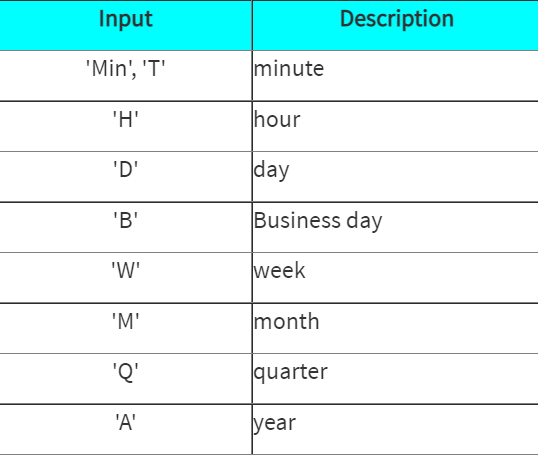

In [ ]:
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
print('Dataset sebelum di-downsampling (5 teratas):\n', gaq.head())
# [1] Downsampling dari daily to weekly dan kita hitung mean untuk seminggu
gaq_weekly = gaq.resample('W').mean()
print('Downsampling daily to weekly - mean (5 teratas):\n', gaq_weekly.head())
# [2] Downsampling dari daily to quaterly dan kita hitung jumlah untuk tiap quarter
gaq_quaterly = gaq.resample('Q').sum()
print('Downsampling daily to quaterly - sum (5 teratas):\n', gaq_quaterly.head())
# [3] Downsampling dari daily to monthly dan kita hitung mean untuk tiap bulan
gaq_monthly = gaq.resample('M').mean()
print('Downsampling daily to monthly - mean (5 teratas):\n', gaq_monthly.head())
# [4] Downsampling dari daily to yearly dan kita hitung jumlah untuk tiap tahun
gaq_quaterly = gaq.resample('A').sum()
print('Downsampling daily to yearly - sum (5 teratas):\n', gaq_quaterly.head())

Dataset sebelum di-downsampling (5 teratas):
                                                   location  ... averaged_over_in_hours
timestamp                                                   ...                       
2017-01-18 16:00:00+00:00                  MOBILE-KICKAPOO  ...                   1.00
2020-04-07 20:00:00+00:00                  Oxford St Ebbes  ...                   1.00
2020-04-07 19:00:00+00:00                 BROADWAY (South)  ...                   1.00
2020-04-07 18:30:00+00:00  Deen Dayal Nagar, Sagar - MPPCB  ...                   0.25
2020-04-07 20:00:00+00:00                        Manglerud  ...                   1.00

[5 rows x 10 columns]
Downsampling daily to weekly - mean (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-18 00:00:00+00:00    9.7    14.635     121.08                     1.0
2014-05-25 00:00:00+00:00    NaN      

In [ ]:
# Upsampling dari daily to hourly dan kita hitung reratanya
gaq_hourly = gaq.resample('H').mean()
print('Upsampling daily to hourly - mean (5 teratas):\n', gaq_hourly.head())

Upsampling daily to hourly - mean (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-13 03:00:00+00:00    9.7    14.635     121.08                     1.0
2014-05-13 04:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 05:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 06:00:00+00:00    NaN       NaN        NaN                     NaN
2014-05-13 07:00:00+00:00    NaN       NaN        NaN                     NaN


In [ ]:
# Resample dari daily to 2 monthly, hitung reratanya, dan fillna = 'bfill'
gaq_2monthly = gaq.resample('2M').mean().fillna(method='bfill')
print('Resampling daily to 2 monthly - mean - ffill (5 teratas):\n', gaq_2monthly.head())

Resampling daily to 2 monthly - mean - ffill (5 teratas):
                            value  latitude  longitude  averaged_over_in_hours
timestamp                                                                    
2014-05-31 00:00:00+00:00    9.7    14.635    121.080                     1.0
2014-07-31 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-09-30 00:00:00+00:00    7.1    37.132    -86.148                     1.0
2014-11-30 00:00:00+00:00   18.1   -34.560    -58.506                     1.0
2015-01-31 00:00:00+00:00   18.1   -34.560    -58.506                     1.0


VISUALISASI TIME SERIES

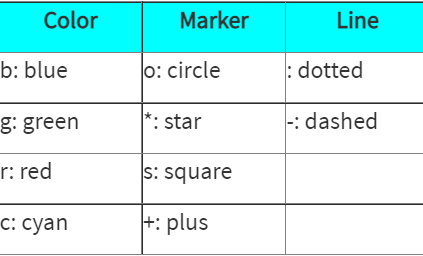

Data (5 teratas):
 pollutant                   bc   co  no2   o3  pm10  pm25  so2
timestamp                                                     
2014-05-13 03:00:00+00:00  0.0  0.0  0.0  0.0   0.0   9.7  0.0
2014-08-12 20:00:00+00:00  0.0  0.0  0.0  0.0   0.0   7.1  0.0
2015-04-15 00:00:00+00:00  0.0  0.0  0.0  0.0   0.0  18.1  0.0
2015-08-21 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0  36.9  0.0
2015-09-13 01:00:00+00:00  0.0  0.0  0.0  0.0   0.0   8.8  0.0


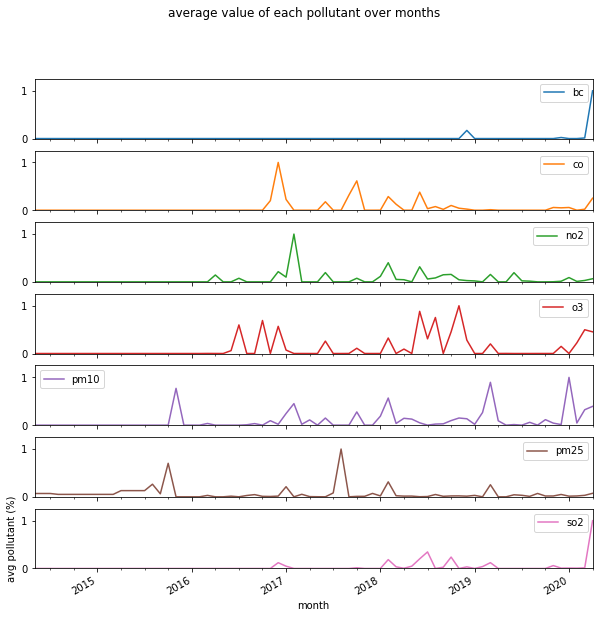

In [ ]:
import matplotlib.pyplot as plt
# Load dataset https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv
gaq = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/global_air_quality_4000rows.csv')
gaq['timestamp'] = pd.to_datetime(gaq['timestamp'])
gaq = gaq.set_index('timestamp')
# [1] Membuat pivot table yang menunjukkan waktu di baris nya dan masing-masing value dari pollutant nya dalam kolom
gaq_viz = gaq[['pollutant', 'value']].reset_index().set_index(['timestamp', 'pollutant'])
gaq_viz = gaq_viz.pivot_table(index='timestamp', columns='pollutant',aggfunc='mean').fillna(0)
gaq_viz.columns = gaq_viz.columns.droplevel(0)
print('Data (5 teratas):\n', gaq_viz.head())
# [2] Membuat fungsi yang memberikan default value 0 ketika value nya di bawah 0 dan apply ke setiap elemen dari dataset tersebut, kemudian menampilkannya sebagai chart
def default_val(val):
 if val < 0:
   return 0
 else:
   return val
line1 = gaq_viz.resample('M').mean().ffill().applymap(lambda x: default_val(x)).apply(lambda x: x/x.max()) # default value if value < 0 then 0, kemudian menghasilkan % value = value/max(value)
line1.plot(
   title = 'average value of each pollutant over months',
   figsize = (10,10), #ukuran canvas 10px x 10px
   ylim = (0,1.25), #memberikan batas tampilan y-axis hanya 0 sampai 125%
   subplots =True #memecah plot menjadi beberapa bagian sesuai dengan jumlah kolom
)
plt.ylabel('avg pollutant (%)')
plt.xlabel('month')
plt.show()

**PROJECT**

**PERFORMA PENJUALAN SETIAP CABANG**



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# [1]. Load masing-masing data dengan pandas
retail_data1 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_1_until_3.csv') #Kuartal 1
retail_data2 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_4_until_6.csv') #Kuartal 2
retail_data3 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_7_until_9.csv') #Kuartal 3
retail_data4 = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/LO4/retail_data_from_10_until_12.csv') #Kuartal 4

# [2]. Pengecekan Data
print('PENGECEKAN DATA\n\n')
#      Cek data sekilas (tampilkan 5 baris teratas)
print(retail_data1.head())
print(retail_data2.head())
print(retail_data3.head())
print(retail_data4.head())
#      Cek list kolom untuk semua dataframe
print('Kolom retail_data1: %s' %retail_data1.columns)
print('Kolom retail_data2: %s' %retail_data2.columns)
print('Kolom retail_data3: %s' %retail_data3.columns)
print('Kolom retail_data4: %s' %retail_data4.columns)
#      Concat multiple dataframe menjadi 1 dataframe
retail_table = pd.concat([retail_data1, retail_data2, retail_data3, retail_data4])
print('\nJumlah baris:', retail_table.shape[0]) #Karena return dari .shape adalah tuple (baris, kolom). Untuk mengakses baris gunakan .shape[0]
#      Pengecekan dataframe info
print('\nInfo:')
print(retail_table.info())
#      Pengecekan statistik deskriptif
print('\nStatistik deskriptif:\n', retail_table.describe())

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


PENGECEKAN DATA


   order_id order_date  customer_id  ... quantity item_price total_price
0   1612339   01-01-19        18055  ...        4    1934000     7736000
1   1612339   01-01-19        18055  ...        8     604000     4832000
2   1612339   01-01-19        18055  ...       12     747000     8964000
3   1612339   01-01-19        18055  ...       12     450000     5400000
4   1612339   01-01-19        18055  ...        3    1500000     4500000

[5 rows x 10 columns]
   order_id order_date  customer_id  ... quantity item_price total_price
0   1637113   01-04-19        16638  ...        4    2987000    11948000
1   1637113   01-04-19        16638  ...        2   20995000    41990000
2   1637113   01-04-19        16638  ...        6    1045000     6270000
3   1637113   01-04-19        16638  ...        6    1045000     6270000
4   1637113   01-04-19        16638  ...        2    2375000     4750000

[5 rows x 10 columns]
  order_id order_date  customer_id  ... quantity item_price 

Catatan :

> (Perbedaan penggunaan operator pada pandas. | dan &)



This is because numpy arrays and pandas series use the bitwise operators rather than logical as you are comparing every element in the array/series with another. It therefore does not make sense to use the logical operator in this situation.

In [ ]:
# [3]. Transformasi Data
print('TRANSFORMASI DATA\n\n')
#      Memastikan data yang memiliki item_price < 0 atau total_price < 0
cek = retail_table.loc[(retail_table['item_price'] < 0) | (retail_table['total_price'] < 0) ] #Penggunaan syntax or berebeda, penjelasan ada di catatan.
print('\nitem_price < 0 atau total_price < 0:\n', cek)
#      Jika tidak masuk akal datanya dapat dibuang
if cek.shape[0] != 0:
	retail_table = retail_table.loc[(retail_table['item_price'] > 0) & (retail_table['total_price'] > 0)] #Penggunaan syntax and berbeda, penjelasan ada di catatan.
#      Cek apakah masih ada order_id yang bernilai undefined dan delete row tersebut
cek = retail_table.loc[retail_table['order_id'] == 'undefined']
print('\norder_id yang bernilai undefined:\n', cek)
#      Jika ada maka buang baris tersebut
if cek.shape[0] != 0:
  retail_table.loc[retail_table['order_id'] != 'undefined']

#      Transform order_id menjadi int64
retail_table['order_id'] = retail_table['order_id'].astype('int64')
#      Transform order_date menjadi datetime Pandas
retail_table['order_date'] = pd.to_datetime(retail_table['order_date'])
#      Cek dataframe info kembali untuk memastikan
print('\nInfo:')
print(retail_table.info())
#      Cek statistik deskriptif kembali, untuk memastikan
print('\nStatistik deskriptif:\n', retail_table.describe())

TRANSFORMASI DATA



item_price < 0 atau total_price < 0:
 Empty DataFrame
Columns: [order_id, order_date, customer_id, city, province, product_id, brand, quantity, item_price, total_price]
Index: []

order_id yang bernilai undefined:
 Empty DataFrame
Columns: [order_id, order_date, customer_id, city, province, product_id, brand, quantity, item_price, total_price]
Index: []

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 326318 entries, 0 to 201825
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   order_id     326318 non-null  int64         
 1   order_date   326318 non-null  datetime64[ns]
 2   customer_id  326318 non-null  int64         
 3   city         326318 non-null  object        
 4   province     326318 non-null  object        
 5   product_id   326318 non-null  object        
 6   brand        326318 non-null  object        
 7   quantity     326318 non-null  int64         
 8   

In [ ]:
# [4]. Filter hanya 5 province terbesar di pulau Jawa
print('\nFILTER 5 PROVINCE TERBESAR DI PULAU JAWA\n')
java = ['DKI Jakarta','Jawa Barat','Jawa Tengah','Jawa Timur','Yogyakarta']
retail_table = retail_table.loc[retail_table['province'].isin(java)]
#      Untuk memastikan kolom provinsi isinya sudah sama dengan java
print(retail_table['province'].unique())

# [5]. Kelompokkan sesuai dengan order_date dan province kemudian aggregasikan
groupby_city_province = retail_table.groupby(['order_date','province']).agg({
   'order_id': 'nunique',
   'customer_id': 'nunique',
   'product_id': 'nunique',
   'brand': 'nunique',
   'total_price': sum
})
#      Ubah nama kolomnya menjadi 'order','customer','product','brand','GMV'
groupby_city_province.columns = ['order','customer','product','brand','GMV']
print('\ngroupby_city_province (10 data teratas):\n', groupby_city_province.head(10))

# [6]. Unstack untuk mendapatkan order_date di bagian baris dan province di bagian column
unstack_city_province = groupby_city_province.unstack('province').fillna(0)
print('\nunstack_city_province (5 data teratas):\n', unstack_city_province.head())


FILTER 5 PROVINCE TERBESAR DI PULAU JAWA

['DKI Jakarta' 'Jawa Barat' 'Jawa Timur' 'Yogyakarta' 'Jawa Tengah']

groupby_city_province (10 data teratas):
                         order  customer  product  brand         GMV
order_date province                                                
2019-01-01 DKI Jakarta     34        33      328     22  4717083000
           Jawa Barat      11         9      136     18  1557289000
           Jawa Tengah      4         4      116     20   352052000
           Jawa Timur       6         6       83     15  1106603000
           Yogyakarta       7         4       88     16  9454007000
2019-01-02 DKI Jakarta     17        17      259     22  1877858000
           Jawa Barat      10         9      194     22  1290147000
           Jawa Tengah      4         3       49     15  1813991000
           Jawa Timur       6         6       63     19   663106000
           Yogyakarta       2         2       56     19   549622000

unstack_city_province (5 dat

In [ ]:
# [7]. Slicing data untuk masing-masing measurement, misal: order
idx = pd.IndexSlice
by_order = unstack_city_province.loc[:,'order']
print('\nby order (5 data teratas):\n', by_order.head())

# [8]. Lakukan resampling pada data tersebut untuk dilakukan perhitungan rata-rata bulanan 
by_order_monthly_mean = by_order.resample('M').mean()
print('\nby_order_monthly_mean (5 data teratas):\n', by_order_monthly_mean.head())


by order (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-01         34.0        11.0          4.0         6.0         7.0
2019-01-02         17.0        10.0          4.0         6.0         2.0
2019-01-03         11.0         4.0         10.0         5.0         6.0
2019-01-04         30.0         7.0          8.0         1.0         8.0
2019-01-05         21.0         8.0          2.0         3.0         2.0

by_order_monthly_mean (5 data teratas):
 province    DKI Jakarta  Jawa Barat  Jawa Tengah  Jawa Timur  Yogyakarta
order_date                                                              
2019-01-31    21.526316    8.684211     4.421053    3.473684    4.368421
2019-02-28    24.391304    8.173913     3.652174    3.869565    4.130435
2019-03-31    25.111111    7.481481     3.703704    4.370370    3.740741
2019-04-30    25.884615    9.807692     4.538462    4